In [1]:
import numpy 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# read data

In [2]:
df=pd.read_csv('spam_ham_dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.shape

(5171, 4)

# Data Preprocessing

In [5]:
df=df.drop('Unnamed: 0', axis=1)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
df.isna().sum()

label        0
text         0
label_num    0
dtype: int64

In [7]:
df.drop_duplicates()
df.shape

(5171, 3)

In [8]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

## remove stopword

In [9]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kshirod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def clean_text(text):
    text=text.lower()
    text=re.sub('[^a-zA-Z]', ' ', text)
    text=text.split()
    text = [word for word in text if word not in stop]
    text=' '.join(text)
    return text

In [11]:
df['text']= df['text'].apply(clean_text)
df.head()

,label,text,label_num
0,ham,subject enron methanol meter follow note gave ...,0
1,ham,subject hpl nom january see attached file hpln...,0
2,ham,subject neon retreat ho ho ho around wonderful...,0
3,spam,subject photoshop windows office cheap main tr...,1
4,ham,subject indian springs deal book teco pvr reve...,0


In [12]:
df.head()

,label,text,label_num
0,ham,subject enron methanol meter follow note gave ...,0
1,ham,subject hpl nom january see attached file hpln...,0
2,ham,subject neon retreat ho ho ho around wonderful...,0
3,spam,subject photoshop windows office cheap main tr...,1
4,ham,subject indian springs deal book teco pvr reve...,0


## visua

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

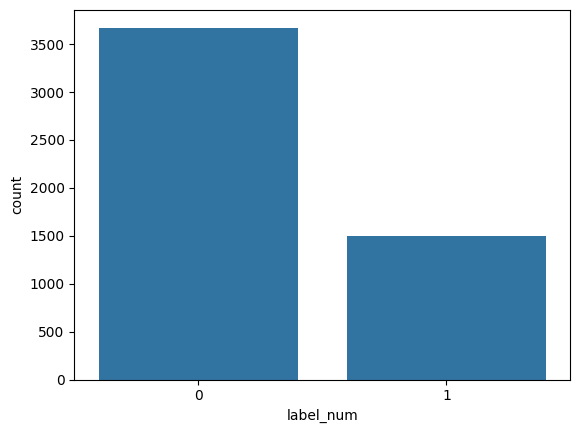

In [14]:
sns.countplot( x='label_num',data=df)
plt.show()

In [15]:
pd.set_option('display.max_colwidth', None)
print(df.iloc[:1]['text'])


0    subject enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes
Name: text, dtype: object


In [16]:
df['text']=df['text'].str.replace('subject', '')

In [17]:
df

,label,text,label_num
0,ham,enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes,0
1,ham,hpl nom january see attached file hplnol xls hplnol xls,0
2,ham,neon retreat ho ho ho around wonderful time year neon leaders retreat time know time year extremely hectic tough think anything past holidays life go past week december january like think minute calender handed beginning fall semester retreat scheduled weekend january youth ministers conference brad dustin connected week going change date following weekend january comes part need think think agree important us get together time recharge batteries get far spring semester lot trouble difficult us get away without kids etc brad came potential alternative get together weekend let know prefer first option would retreat similar done past several years year could go heartland country inn www com outside brenham nice place bedroom bedroom house side side country real relaxing also close brenham one hour minutes golf shop antique craft stores brenham eat dinner together ranch spend time meet saturday return sunday morning like done past second option would stay houston dinner together nice restaurant dessert time visiting recharging one homes saturday evening might easier trade would much time together let decide email back would preference course available weekend democratic process prevail majority vote rule let hear soon possible preferably end weekend vote go way complaining allowed like tend great weekend great golf great fishing great shopping whatever makes happy bobby,0
3,spam,photoshop windows office cheap main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin,1
4,ham,indian springs deal book teco pvr revenue understanding teco sends us check received answer whether predermined price associated deal teco lets us know giving continue chase deal need,0
...,...,...,...
5166,ham,put ft transport volumes decreased contract thanks ami forwarded ami chokshi corp enron royal b edmondson reliantenergy com ami chokshi enron com cc put ft see attached file hpl sept xls hpl sept xls,0
5167,ham,following noms hpl take extra mmcf weekend try next week nom stay mmcf redeliveries pg e fcv carthage forwarded bruce mcmills ftworth pefs pec bruce mcmills dfarmer enron com briley enron com stacey neuweiler enron com cc chad w cass gcs cec pec pec william e speckels gcs cec pec pec donna c spencer gcs cec pec pec michael r cherry easttexas pefs pec pec darrel f bane easttexas pefs pec pec following noms nominate mmbtu eastrans following deliver pg e fuel cotton valley continue mmbtu sale mmbtu cartwheel agreement carthage,0
5168,ham,calpine daily gas nomination julie mention earlier hope start unit afternoon still experiencing difficulties keep informed thanks ricky archer fuel supply louisiana suite houston texas direct fax calpine daily gas nomination doc calpine daily gas nomination doc,0
5169,ham,industrial worksheets august activity attached worksheets august activity three different worksheets supply market market worksheet preliminary continuously updated throughout month supply worksheets capture buybacks relevant pricing data three worksheets found two separate files logistics robert lloyd buydeaug xls supply logistics ken sorry delay providing data,0


## word cloud

In [18]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['text'])
 
    plt.figure(figsize=(7, 7))
 
    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)
 
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()
 

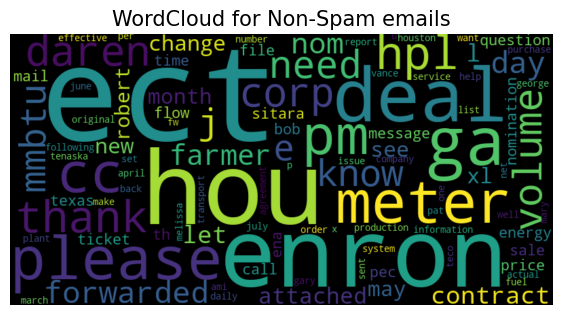

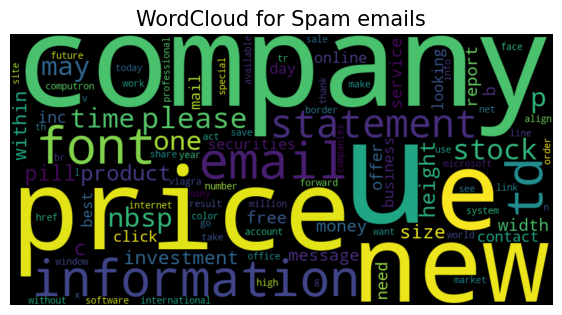

In [19]:

plot_word_cloud(df[df['label_num'] == 0], typ='Non-Spam')
plot_word_cloud(df[df['label_num'] == 1], typ='Spam')

# split data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], 
                                                    test_size = 0.2, random_state = 0, 
                                                    shuffle = True, stratify = df['label'])

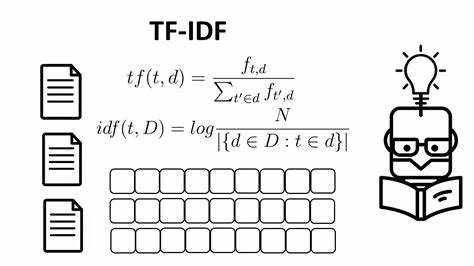

In [22]:
# a,b= df['label'].value_counts()

In [23]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# model =RandomForestClassifier (iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=False)
# model.fit(X_train_tfidf, y_train)
# y_pred = model.predict(X_test_tfidf)

In [24]:
model = RandomForestClassifier(n_estimators=150,oob_score=True)
model.fit(X_train_tfidf,y_train) 

RandomForestClassifier(n_estimators=150, oob_score=True)

In [25]:
X_train_tfidf.shape

(4136, 40790)

In [26]:
ac= model.oob_score_ # (Out-of-Bag )
print(ac)

0.9777562862669246


In [27]:
def predict (X_test,model):
    predict2=model.predict(X_test)
    return predict2

In [28]:
a=predict (X_test_tfidf,model)


In [29]:
a

array(['spam', 'spam', 'ham', ..., 'spam', 'spam', 'ham'],
      shape=(1035,), dtype=object)

In [30]:
def cal_acuracy(y_test,predict2):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, predict2))
    print("Accuracy : ",
          accuracy_score(y_test, predict2)*100)
    print("Report : ",
          classification_report(y_test, predict2))

In [31]:
cal_acuracy(y_test,a)

Confusion Matrix:  [[720  15]
 [  4 296]]
Accuracy :  98.16425120772946
Report :                precision    recall  f1-score   support

         ham       0.99      0.98      0.99       735
        spam       0.95      0.99      0.97       300

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



# Custom input to check model accuracy

In [32]:
mail = '''

Subject: photoshop , windows , office . cheap . main trending
abasements darer prudently fortuitous undergone
lighthearted charm orinoco taster
railroad affluent pornographic cuvier
irvin parkhouse blameworthy chlorophyll
robed diagrammatic fogarty clears bayda
inconveniencing managing represented smartness hashish
academies shareholders unload badness
danielson pure caffein
spaniard chargeable levin 

'''

vectroizer_mail = vectorizer.transform([mail])
result = predict(vectroizer_mail,model)

In [33]:
print('The mail is ' + result[0])

The mail is spam
